In [1]:
from src import Modeler, Processor, Reader
import pandas as pd
from datetime import datetime
from sklearn import metrics, model_selection, preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

In [2]:
# Using the US Census regions from here: https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf
south_atlantic_states = [
    10   # Delaware
    , 11 # DC
    , 12 # Florida
    , 13 # Georgia
    , 24 # Maryland
    , 37 # North Carolina
    , 45 # South Carolina
    , 51 # Virginia
    , 54 # West Virginia
]
state_filter = south_atlantic_states

In [3]:
state_dict = {
    'code' : ['10', '11', '12', '13', '24', '37', '45', '51', '54']
    , 'state_name' : ['Delware', 'DC', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia']
}

state_code_map = pd.DataFrame(data=state_dict)

## testing lag logic

In [7]:
cd_reader = Reader.CasesAndDeathsReader()

In [8]:
df = cd_reader.read_and_process_data(state_filter=state_filter)

In [9]:
df.head()

,FIPS,date,cases,deaths,previous_day_cases,new_cases,smoothed_new_cases,8_days_prior_cases,9_days_prior_cases,10_days_prior_cases,previous_day_deaths,new_deaths,smoothed_new_deaths,8_days_prior_deaths,9_days_prior_deaths,10_days_prior_deaths
0,10001,2020-03-18,3,0.0,0.0,3.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
1,10001,2020-03-19,4,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10001,2020-03-20,4,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10001,2020-03-21,5,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10001,2020-03-22,5,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Instantiate preprocessor
preprocessor = Processor.PreProcessor(state_filter=state_filter)

In [11]:
preprocessor.load_processed_data_without_fips_as_columns()

/Users/elizabethmartens/cs5644/project/projectGitRepo/src/Processor.py:36: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  merged_df = self.init_cdc_data().merge(self.init_vaccinations_data(), how='left', on=['date', 'FIPS'])
/Users/elizabethmartens/cs5644/project/projectGitRepo/src/Processor.py:36: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  merged_df = self.init_cdc_data().merge(self.init_vaccinations_data(), how='left', on=['date', 'FIPS'])


In [12]:
df = preprocessor.get_current_data()

In [14]:
df.head()

,gathering_ban_order_group_ban_gatherings_of_any_size,gathering_ban_order_group_ban_over_101_or_more_ppl,gathering_ban_order_group_ban_over_11_to_25_ppl,gathering_ban_order_group_ban_over_1_to_10_ppl,gathering_ban_order_group_ban_over_26_to_50_ppl,gathering_ban_order_group_ban_over_51_to_100_ppl,gathering_ban_order_group_no_order_found,gathering_ban_express_preemption_Expressly Preempts,gathering_ban_express_preemption_Expressly Preempts Less Restrictive Measures,gathering_ban_express_preemption_Unknown,...,10_days_prior_cases,previous_day_deaths,new_deaths,smoothed_new_deaths,8_days_prior_deaths,9_days_prior_deaths,10_days_prior_deaths,month,days_from_start,STATE
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.428571,3.0,0.0,0.142857,0.285714,0.285714,0.285714,April,0,10
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.857143,3.0,1.0,0.285714,0.285714,0.285714,0.285714,April,1,10
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.428571,4.0,0.0,0.285714,0.000000,0.285714,0.285714,April,2,10
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,4.714286,4.0,2.0,0.428571,0.000000,0.000000,0.285714,April,3,10
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,6.142857,6.0,1.0,0.571429,0.142857,0.000000,0.000000,April,4,10


In [15]:
cd_df = df[['date'
            , 'FIPS'
            , 'cases'
            , 'deaths'
            , 'previous_day_cases'
            , 'previous_day_deaths'
            , 'new_cases'
            , 'new_deaths'
            , 'smoothed_new_cases'
            , 'smoothed_new_deaths'
            , '8_days_prior_cases'
            , '9_days_prior_cases'
            , '10_days_prior_cases'
            , '8_days_prior_deaths'
            , '9_days_prior_deaths'
            , '10_days_prior_deaths'
           ]]
cd_df.head()

,date,FIPS,cases,deaths,previous_day_cases,previous_day_deaths,new_cases,new_deaths,smoothed_new_cases,smoothed_new_deaths,8_days_prior_cases,9_days_prior_cases,10_days_prior_cases,8_days_prior_deaths,9_days_prior_deaths,10_days_prior_deaths
0,2020-04-10,10001,230.0,3.0,214.0,3.0,16.0,0.0,25.142857,0.142857,3.428571,3.857143,3.428571,0.285714,0.285714,0.285714
1,2020-04-11,10001,255.0,4.0,230.0,3.0,25.0,1.0,26.714286,0.285714,4.714286,3.428571,3.857143,0.285714,0.285714,0.285714
2,2020-04-12,10001,281.0,4.0,255.0,4.0,26.0,0.0,27.857143,0.285714,6.142857,4.714286,3.428571,0.000000,0.285714,0.285714
3,2020-04-13,10001,288.0,6.0,281.0,4.0,7.0,2.0,22.857143,0.428571,8.714286,6.142857,4.714286,0.000000,0.000000,0.285714
4,2020-04-14,10001,329.0,7.0,288.0,6.0,41.0,1.0,26.000000,0.571429,14.428571,8.714286,6.142857,0.142857,0.000000,0.000000


In [20]:
cd_only_md = cd_df[cd_df['FIPS'].apply(lambda x: x[:2] == '24')]
cd_only_md = cd_df[cd_df['FIPS'].isin(['24029', '24031', '24033', '24035'])]

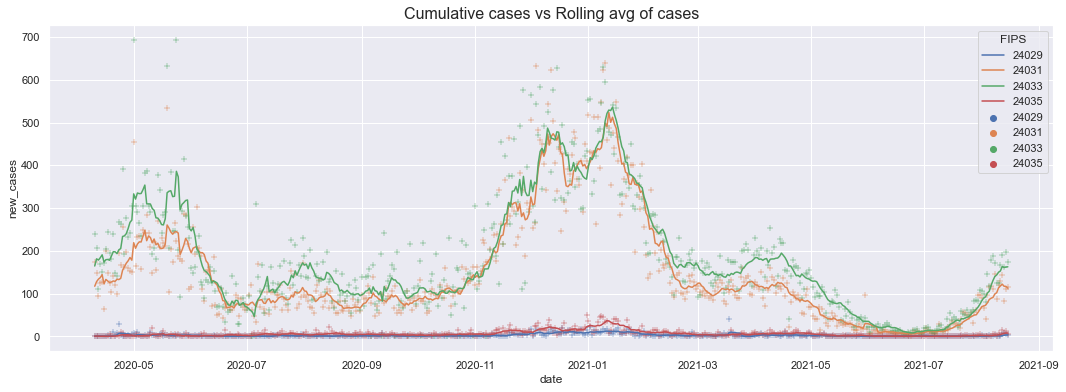

In [21]:

plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='new_cases', data=cd_only_md, hue='FIPS', marker='+');
sns.lineplot(x='date', y='smoothed_new_cases', data=cd_only_md, hue='FIPS');
plt.title('Cumulative cases vs Rolling avg of cases', fontsize=16);
plt.show()


In [22]:
cd_df[cd_df['FIPS'] == '24033'].head(50)

,date,FIPS,cases,deaths,previous_day_cases,previous_day_deaths,new_cases,new_deaths,smoothed_new_cases,smoothed_new_deaths,8_days_prior_cases,9_days_prior_cases,10_days_prior_cases,8_days_prior_deaths,9_days_prior_deaths,10_days_prior_deaths
65170,2020-04-10,24033,1716.0,42.0,1476.0,35.0,240.0,7.0,164.714286,4.714286,53.142857,46.714286,39.714286,0.714286,0.714286,0.714286
65171,2020-04-11,24033,1923.0,50.0,1716.0,42.0,207.0,8.0,181.428571,5.285714,59.285714,53.142857,46.714286,1.000000,0.714286,0.714286
65172,2020-04-12,24033,2035.0,55.0,1923.0,50.0,112.0,5.0,178.571429,5.571429,65.285714,59.285714,53.142857,1.428571,1.000000,0.714286
65173,2020-04-13,24033,2205.0,63.0,2035.0,55.0,170.0,8.0,184.142857,5.714286,76.857143,65.285714,59.285714,1.857143,1.428571,1.000000
65174,2020-04-14,24033,2356.0,72.0,2205.0,63.0,151.0,9.0,190.857143,6.571429,88.857143,76.857143,65.285714,2.428571,1.857143,1.428571
65175,2020-04-15,24033,2527.0,76.0,2356.0,72.0,171.0,4.0,173.857143,6.285714,97.000000,88.857143,76.857143,2.714286,2.428571,1.857143
65176,2020-04-16,24033,2732.0,80.0,2527.0,76.0,205.0,4.0,179.428571,6.428571,129.571429,97.000000,88.857143,3.571429,2.714286,2.428571
65177,2020-04-17,24033,2976.0,87.0,2732.0,80.0,244.0,7.0,180.000000,6.428571,143.285714,129.571429,97.000000,4.000000,3.571429,2.714286
65178,2020-04-18,24033,3170.0,95.0,2976.0,87.0,194.0,8.0,178.142857,6.428571,164.714286,143.285714,129.571429,4.714286,4.000000,3.571429
65179,2020-04-19,24033,3352.0,105.0,3170.0,95.0,182.0,10.0,188.142857,7.142857,181.428571,164.714286,143.285714,5.285714,4.714286,4.000000


### Creating logic for smoothing + feature addition

In [172]:
df = df.sort_values(['FIPS','date'])
df = df.set_index(['FIPS', 'date'], drop=True)

In [173]:
df['previous_day_cases'] = df.groupby(['FIPS'], as_index=False)[['cases']].shift(periods=1)
df['new_cases'] = df['cases'] - df['previous_day_cases']
df['new_cases'] = df['new_cases'].apply(lambda x: max(0, x))

In [174]:
test = df.groupby(['FIPS'], as_index=False)['new_cases'].rolling(7).mean().reset_index(drop=True)
test.head(10)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6    17.428571
7    22.000000
8    23.142857
9    19.428571
Name: new_cases, dtype: float64

In [175]:
df = df.reset_index()
df['rolling_new_cases'] = df.groupby(['FIPS'], as_index=False)['new_cases'].rolling(7).mean().reset_index(drop=True).fillna(0)
df['rolling_cases'] = df.groupby(['FIPS'], as_index=False)['cases'].rolling(7).mean().reset_index(drop=True).fillna(0)

In [176]:
df[['cases', 'previous_day_cases', 'new_cases', 'rolling_cases', 'rolling_new_cases']].head(10)

,cases,previous_day_cases,new_cases,rolling_cases,rolling_new_cases
0,230.0,NaN,0.0,0.000000,0.000000
1,255.0,230.0,25.0,0.000000,0.000000
2,281.0,255.0,26.0,0.000000,0.000000
3,288.0,281.0,7.0,0.000000,0.000000
4,329.0,288.0,41.0,0.000000,0.000000
5,345.0,329.0,16.0,0.000000,0.000000
6,352.0,345.0,7.0,297.142857,17.428571
7,384.0,352.0,32.0,319.142857,22.000000
8,417.0,384.0,33.0,342.285714,23.142857
9,417.0,417.0,0.0,361.714286,19.428571


In [189]:
single_county_df = df[df['FIPS'] == '12011']

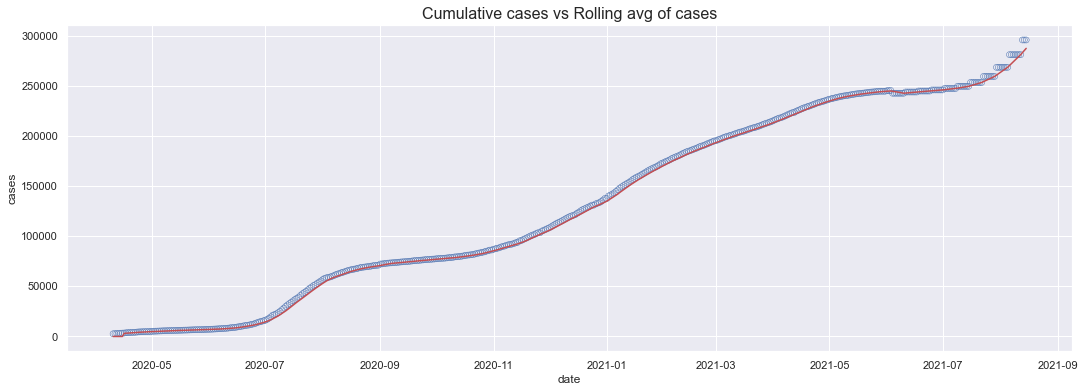

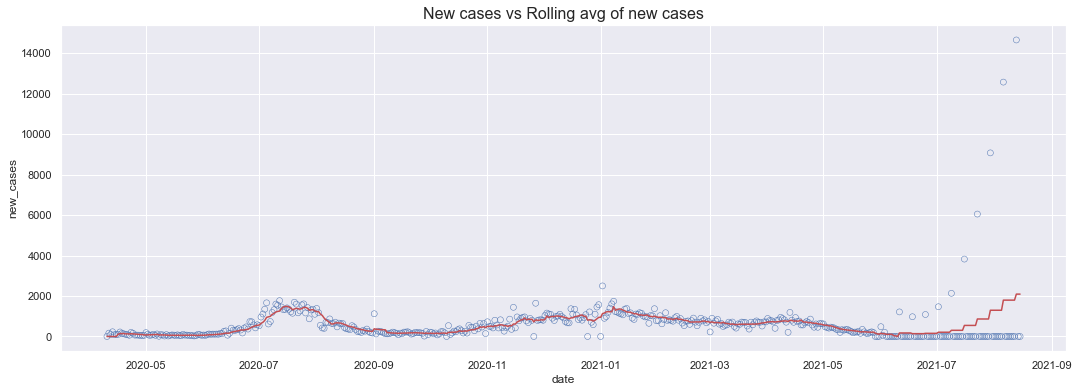

In [183]:
plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='cases', data=single_county_df, color='none', edgecolor='b');
sns.lineplot(x='date', y='rolling_cases', data=single_county_df, color='r');
plt.title('Cumulative cases vs Rolling avg of cases', fontsize=16);
plt.show()

plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='new_cases', data=single_county_df, color='none', edgecolor='b');
sns.lineplot(x='date', y='rolling_new_cases', data=single_county_df, color='r');
plt.title('New cases vs Rolling avg of new cases', fontsize=16);
plt.show()

In [167]:
df_12011[df_12011['date'] > '2020-12-29'][['date', 'cases', 'previous_day_cases','rolling_cases', 'new_cases', 'rolling_new_cases']].head(10)

,date,cases,previous_day_cases,rolling_cases,new_cases,rolling_new_cases
4701,2020-12-30,136038.0,134582.0,133020.857143,1456.0,877.285714
4702,2020-12-31,137610.0,136038.0,133968.285714,1572.0,947.428571
4703,2021-01-01,137610.0,137610.0,134915.714286,0.0,947.428571
4704,2021-01-02,140110.0,137610.0,136046.714286,2500.0,1131.000000
4705,2021-01-03,141010.0,140110.0,137205.714286,900.0,1159.000000
4706,2021-01-04,141993.0,141010.0,138421.857143,983.0,1216.142857
4707,2021-01-05,143186.0,141993.0,139651.000000,1193.0,1229.142857
4708,2021-01-06,144590.0,143186.0,140872.714286,1404.0,1221.714286
4709,2021-01-07,146201.0,144590.0,142100.000000,1611.0,1227.285714
4710,2021-01-08,147944.0,146201.0,143576.285714,1743.0,1476.285714


In [ ]:
140110-137610

In [170]:
np.mean([1456, 1572, 0, 2500, 900, 983, 1193])

1229.142857142857

In [ ]:
## Setting cases 8, 9, 10 days prior
# df = df.sort_values(['FIPS','date'])
# df = df.set_index(['FIPS', 'date'], drop=True)

In [188]:
df['8_days_prior_cases'] = df.groupby(['FIPS'], as_index=False)[['rolling_new_cases']].shift(periods=8).fillna(0)
df['9_days_prior_cases'] = df.groupby(['FIPS'], as_index=False)[['rolling_new_cases']].shift(periods=9).fillna(0)
df['10_days_prior_cases'] = df.groupby(['FIPS'], as_index=False)[['rolling_new_cases']].shift(periods=10).fillna(0)

In [190]:
single_county_df[single_county_df['date'] > '2020-12-29'][['date', 'cases', 'previous_day_cases','rolling_cases', 'new_cases', 'rolling_new_cases', '8_days_prior_cases', '9_days_prior_cases', '10_days_prior_cases']].head(10)


,date,cases,previous_day_cases,rolling_cases,new_cases,rolling_new_cases,8_days_prior_cases,9_days_prior_cases,10_days_prior_cases
4701,2020-12-30,136038.0,134582.0,133020.857143,1456.0,877.285714,1064.428571,1045.285714,1010.571429
4702,2020-12-31,137610.0,136038.0,133968.285714,1572.0,947.428571,1002.000000,1064.428571,1045.285714
4703,2021-01-01,137610.0,137610.0,134915.714286,0.0,947.428571,998.142857,1002.000000,1064.428571
4704,2021-01-02,140110.0,137610.0,136046.714286,2500.0,1131.000000,805.714286,998.142857,1002.000000
4705,2021-01-03,141010.0,140110.0,137205.714286,900.0,1159.000000,827.285714,805.714286,998.142857
4706,2021-01-04,141993.0,141010.0,138421.857143,983.0,1216.142857,808.142857,827.285714,805.714286
4707,2021-01-05,143186.0,141993.0,139651.000000,1193.0,1229.142857,760.428571,808.142857,827.285714
4708,2021-01-06,144590.0,143186.0,140872.714286,1404.0,1221.714286,802.714286,760.428571,808.142857
4709,2021-01-07,146201.0,144590.0,142100.000000,1611.0,1227.285714,877.285714,802.714286,760.428571
4710,2021-01-08,147944.0,146201.0,143576.285714,1743.0,1476.285714,947.428571,877.285714,802.714286


In [191]:
single_county_df[['date', 'cases', 'previous_day_cases','rolling_cases', 'new_cases', 'rolling_new_cases', '8_days_prior_cases', '9_days_prior_cases', '10_days_prior_cases']].head(10)


,date,cases,previous_day_cases,rolling_cases,new_cases,rolling_new_cases,8_days_prior_cases,9_days_prior_cases,10_days_prior_cases
4437,2020-04-10,2679.0,NaN,0.000000,0.0,0.000000,0.0,0.0,0.0
4438,2020-04-11,2844.0,2679.0,0.000000,165.0,0.000000,0.0,0.0,0.0
4439,2020-04-12,2945.0,2844.0,0.000000,101.0,0.000000,0.0,0.0,0.0
4440,2020-04-13,3177.0,2945.0,0.000000,232.0,0.000000,0.0,0.0,0.0
4441,2020-04-14,3261.0,3177.0,0.000000,84.0,0.000000,0.0,0.0,0.0
4442,2020-04-15,3363.0,3261.0,0.000000,102.0,0.000000,0.0,0.0,0.0
4443,2020-04-16,3466.0,3363.0,3105.000000,103.0,112.428571,0.0,0.0,0.0
4444,2020-04-17,3688.0,3466.0,3249.142857,222.0,144.142857,0.0,0.0,0.0
4445,2020-04-18,3838.0,3688.0,3391.142857,150.0,142.000000,0.0,0.0,0.0
4446,2020-04-19,3971.0,3838.0,3537.714286,133.0,146.571429,0.0,0.0,0.0
